# Tareas

## Profe, yo pasé los archivos de la carpeta 'data' al mismo directorio del ipynb. Uso Windows y no sé si hubiese podido causar problemas el usar "\\" en lugar de "\/" para separar los directorios. Preferí no correr el riesgo. Igual en lugar de ! cat, uso !powershell cat. PS: No uso Docker porque tengo un disco duro de 128 GB y casi nada de espacio :( 

In [1]:
from scipy import *
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from ipywidgets import interact, fixed, widgets

In [2]:
f = lambda data:np.sum((data[1]-B0-np.dot(data[0],B1))**2);
B0 = Symbol('B0');
B1 = Symbol('B1')
error_promedio = lambda dat,a,b:f(dat).subs(B0,a).subs(B1,b)*(1/len(dat[1]))

In [3]:
#data es un array bidimensional
#guess es un array de una dimensión con el punto de partida para iniciar el algoritmo
#iteraciones es el número máximo de veces que se ejecuta el algoritmo
#En lugar de un parámetro alfa fijo, decidí usar un tamaño del vector en el que me desplazo
#Error es el error cuadrático promedio que se desea. El algoritmo se detiene si alcanza el número máximo de iteraciones
# o si el error promedio es menor que el indicado. Si el parámetro 'error' es -1, simplemente se llega al máximo de
#iteraciones. La función regresa un array de tantas filas como iteraciones y 2 columnas (La primera para B0 y la segunda
#para B1).
def optimizar(data,guess,iteraciones,stepsize,error):
    g1 = diff(f(data),B0)
    g2 = diff(f(data),B1)
    guesses = np.array([]).astype("float")
    its = iteraciones
    if error == -1:
        while iteraciones != 0:
            guess = guess-((stepsize*np.array([g1.subs(B0,guess[0]).subs(B1,guess[1]),g2.subs(B0,guess[0]).subs(B1,guess[1])]).astype("float"))/np.linalg.norm(np.array([g1.subs(B0,guess[0]).subs(B1,guess[1]),g2.subs(B0,guess[0]).subs(B1,guess[1])]).astype("float")))
            iteraciones = iteraciones-1
            guesses = np.append(guesses,guess)
        return guesses.reshape(its,2)
    else:
        while (iteraciones != 0 and error_promedio(data,guess[0],guess[1])):
            guess = guess-chiquitin*np.array([g1.subs(B0,guess[0]).subs(B1,guess[1]),g2.subs(B0,guess[0]).subs(B1,guess[1])])
            iteraciones = iteraciones-1
            guesses = np.append(guesses,guess)
        return guesses.reshape(its,2),its-iteraciones

<div class="alert alert-warning">
Fecha límite de entrega: 30 de Septiembre, 2021 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [4]:
x = Symbol("x");
y = Symbol("y");
m = Symbol("m");
i = Symbol("i")

In [5]:
Sumatoria1 = Sum((Indexed(y,i)-B0-B1*Indexed(x,i))**2,(i,1,m))*(1/2*m)

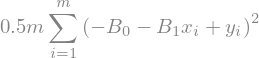

In [6]:
Sumatoria1

In [7]:
dB0 = simplify(diff(Sumatoria1,B0));
dB1 = simplify(diff(Sumatoria1,B1))

Primera entrada del gradiente

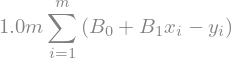

In [8]:
dB0

Segunda entrada del gradiente

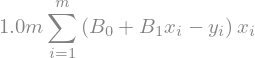

In [9]:
dB1

Como \\(B_{0}+B_{1}x_{i} = \vec{y}(x_{i})\\) y \\(x_{i}^{(1)} = x_{i}\\) y asumimos que \\(x_{i}^{(0)} = 1\\), entonces \\(\sum_{i=1}^{m}(x_i^{(0)},x_{i}^{(1)}) \cdot (B_{0}+B_{1}x_{i}-y_{i},B_{0}+B_{1}x_{i}-y_{i}) = \sum_{i=1}^{m}(\vec{y}(x_{i})-y(x_{i})) \cdot x_{i}^{(j)} = (\sum_{i=1}^{m}(\vec{y}(x_{i})-y(x_{i})),\sum_{i=1}^{m}(\vec{y}(x_{i})-y(x_{i}))x_{i})\\). Esto coincide con las entradas del gradiente mostradas arriba.

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [10]:
datos = np.array([np.loadtxt("edad.dat"),np.loadtxt("altura.dat")])

In [11]:
#g es la función original y g_v es la versión 'vectorizada'
#f = lambda data:np.sum((data[1]-B0-np.dot(data[0],B1))**2);
g = lambda X,Y:f(datos).subs(B0,X).subs(B1,Y)/(2*len(datos[0]))
g_v = np.vectorize(g)

In [12]:
X = np.arange(-1,1,0.2)
Y = np.arange(-1,1,0.2)
X, Y = np.meshgrid(X, Y)
Z = g_v(X,Y)

In [13]:
#Obtengo las aproximaciones
aproximaciones = optimizar(datos,np.array([-1,0]),1001,0.005,-1);
Xg = aproximaciones[:,0];
Yg = aproximaciones[:,1];
Zg = g_v(Xg,Yg)

In [14]:
#Mejor aproximación
print(aproximaciones[-1])
print("error cuadrático promedio: " + str(g(Xg[-1],Yg[-1])*2))

[0.74809986 0.06679747]
error cuadrático promedio: 0.00215020254672440


In [15]:
def graficar3d(A,B,C,Ag,Bg,Cg,i):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    surf = ax.plot_surface(A,B,C.astype("float"),rstride=1,cstride=1,cmap=cm.jet,linewidth=0, antialiased=False,alpha=0.3)
    ax.scatter(Ag[i],Bg[i],Cg[i],alpha=1,s=50,color="black")
    plt.show()

In [16]:
def contour_plot(A,B,C,Ag,Bg,Cg,levels,i):
    fig = plt.figure()
    plt.contour(X,Y,Z.astype("float"),levels ,linewidths=4);
    plt.scatter(Ag[i],Bg[i],alpha=1,s=50,color="black")
    plt.text(0.2,0.2,"x = " + str(Ag[i])[:10] + ", " + "y = " + str(Bg[i])[:10],
             horizontalalignment='center',
             verticalalignment='center',
             
             color="black",
            fontsize="14")
    plt.show()

In [17]:
interact(graficar3d,
         A=fixed(X),
         B=fixed(Y),
         C=fixed(Z),
         Ag=fixed(Xg),
         Bg=fixed(Yg),
         Cg=fixed(Zg),
         i=widgets.IntSlider(min=0,max=1000,step=20,value=50))

interactive(children=(IntSlider(value=50, description='i', max=1000, step=20), Output()), _dom_classes=('widge…

<function __main__.graficar3d(A, B, C, Ag, Bg, Cg, i)>

In [18]:
levels1 = np.arange(0,20,0.5)

In [19]:
interact(contour_plot,
         A=fixed(X),
         B=fixed(Y),
         C=fixed(Z),
         Ag=fixed(Xg),
         Bg=fixed(Yg),
         Cg=fixed(Zg),
         levels=fixed(levels1),
         i=widgets.IntSlider(min=0,max=1000,step=20,value=50))

interactive(children=(IntSlider(value=50, description='i', max=1000, step=20), Output()), _dom_classes=('widge…

<function __main__.contour_plot(A, B, C, Ag, Bg, Cg, levels, i)>

## Regresión resultante
B0 = 0.676926541982094 y B1 = 0.0772055441991087

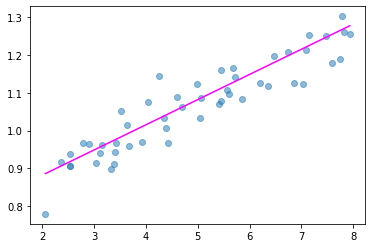

In [20]:
plt.plot(datos[0],Xg[-1]+datos[0]*Yg[-1],color="magenta")
plt.scatter(datos[0],datos[1],alpha=0.5)
plt.show()

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [23]:
!powershell cat chirps.txt

#Chirps/Second 	Temperature (¶§ F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


In [24]:
chirps = np.loadtxt("chirps.txt",skiprows=1,delimiter=" \t").transpose()

In [25]:
opchirps = optimizar(chirps,np.array([25,7]),2001,0.01,-1)

In [26]:
opchirps[-1]

array([24.51976302,  3.31402161])

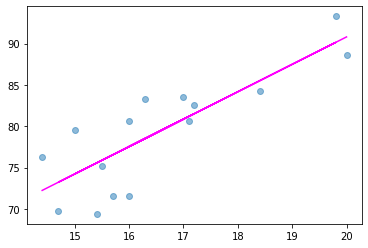

In [27]:
plt.scatter(chirps[0],chirps[1],alpha=0.5)
plt.plot(chirps[0],opchirps[-1][0]+opchirps[-1][1]*chirps[0],color="magenta")
plt.show()

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

In [28]:
#En mi caso, en lugar de un valor concreto de alfa, decidí calcular el vector unitario del gradiente y multiplicarlo por un
#"stepsize". Para este ejercicio usé un stepsize de 0.005 y 2001 iteraciones para llegar a los valores que usé para la 
#regresión. Los datos no coinciden con los de la página, pero el error promedio es muy similar.

In [29]:
print(error_promedio(chirps,22.85,3.41))

14.1548206000000


In [30]:
print(error_promedio(chirps, opchirps[-1][0], opchirps[-1][1]))

14.1858789910263



**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [31]:
anscombe1 = np.array([[10,8,13,9,11,14,6,4,12,7,5],[8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]])
anscombe2 = np.array([[10,8,13,9,11,14,6,4,12,7,5],[9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74]])
anscombe3 = np.array([[10,8,13,9,11,14,6,4,12,7,5],[7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]])
anscombe4 = np.array([[8,8,8,8,8,8,8,19,8,8,8],[6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89]])

In [32]:
opanscombe1 = optimizar(anscombe1,np.array([5,0.8]),2001,0.01,-1)[-1]
opanscombe2 = optimizar(anscombe2,np.array([5,0.8]),2001,0.01,-1)[-1]
opanscombe3 = optimizar(anscombe3,np.array([5,0.8]),2001,0.01,-1)[-1]
opanscombe4 = optimizar(anscombe4,np.array([5,0.8]),2001,0.01,-1)[-1]

In [33]:
print(opanscombe1,opanscombe2,opanscombe3,opanscombe4)


[3.01955044 0.50318844] [3.02036066 0.50309832] [3.02189091 0.50282709] [3.02117087 0.5030082 ]


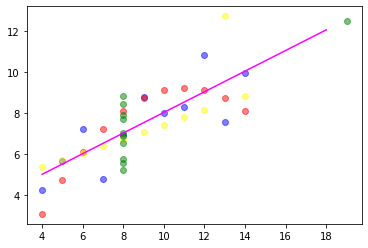

In [34]:
Xa = np.linspace(4,18,14)
plt.scatter(anscombe1[0],anscombe1[1],c="blue",alpha=0.5)
plt.scatter(anscombe2[0],anscombe2[1],c="red",alpha=0.5)
plt.scatter(anscombe3[0],anscombe3[1],c="yellow",alpha=0.5)
plt.scatter(anscombe4[0],anscombe4[1],c="green",alpha=0.5)
plt.plot(Xa,opanscombe1[0]+opanscombe1[1]*Xa,c="magenta",zorder=4)
plt.show()

Al calcular la regresión lineal para los datos del Cuarteto de Anscombe los parámetros para la recta terminan siendo casi idénticos. Es la misma regresión la que ajusta a todos los sets de datos del cuarteto.

## Problema 5

Use el archivo `radioactive_decay.dat`

In [37]:
!powershell cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


In [38]:
rdecay = np.loadtxt("radioactive_decay.txt",skiprows=1,delimiter="\t").transpose()

**(a)** Grafique los datos ¿Qué forma tienen?

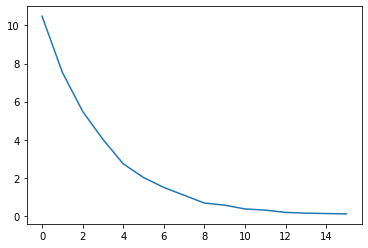

In [39]:
plt.plot(rdecay[0],rdecay[1])
plt.show()

Tiene forma de exponencial

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

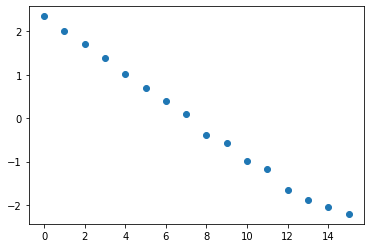

In [40]:
#Grafico los datos después de aplicarles logaritmo natural para linearizarlos
plt.scatter(rdecay[0],np.log(rdecay[1]))
plt.show()

In [41]:
np.save("rdecay_l.npy",np.array([rdecay[0],np.log(rdecay[1])]))

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [42]:
#Cargo el array con los datos
linearizados = np.load("rdecay_l.npy")

In [43]:
regrdecay = optimizar(linearizados,np.array([2,-0.5]),2001,0.01,-1)[-1]

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [44]:
print("Los valores que mejor ajustan son B0 = " + str(regrdecay[0]) + "y B1 = " + str(regrdecay[1]))

Los valores que mejor ajustan son B0 = 2.296132357760529y B1 = -0.32161512950354904


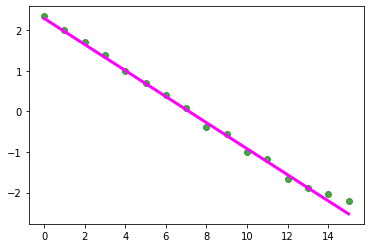

In [45]:
plt.scatter(linearizados[0],linearizados[1],color="green",alpha=0.7)
plt.plot(np.linspace(0,15,15),regrdecay[0]+np.linspace(0,15,15)*regrdecay[1],linewidth=3, color="magenta")
plt.show()

In [46]:
#Los datos sin transformar serían representados por la curva dada por Exp[B0+B1*x], pues antes a los datos les apliqué 
#logaritmo natural para linearizarlos

In [47]:
rdec = lambda B0,B1,x: np.exp(B0+B1*x)

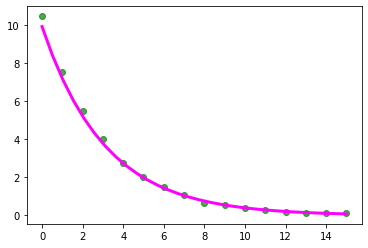

In [48]:
plt.plot(np.linspace(0,15,30),rdec(regrdecay[0],regrdecay[1],np.linspace(0,15,30)),linewidth=3,color="magenta")
plt.scatter(rdecay[0],rdecay[1],color="green",alpha=0.7)
plt.show()

En la gráfica se comparan los datos originales con la gráfica de \\(e^{B_{0}+B_{1}x}\\). Conviene más transformar los datos antes de calcular la regresión para poder obtener una curva que se aproxime mejor a los datos.